# Multi Layer Perceptrone or MLP 

MLP is also known as neural network in which, bunch of single neurons are stacked to form a layer and layers are stacked to form a network of neurons. 

Neural netowrk is inspired from biological connection of brain to get true performance. 

# Example when to use MLP: 

Lets consider below example, where datapoints are scattered in such a way that they are not linearly separable: 

No single function can generalise the dataset but with the help of composition of several functions the generalisation could be done. 

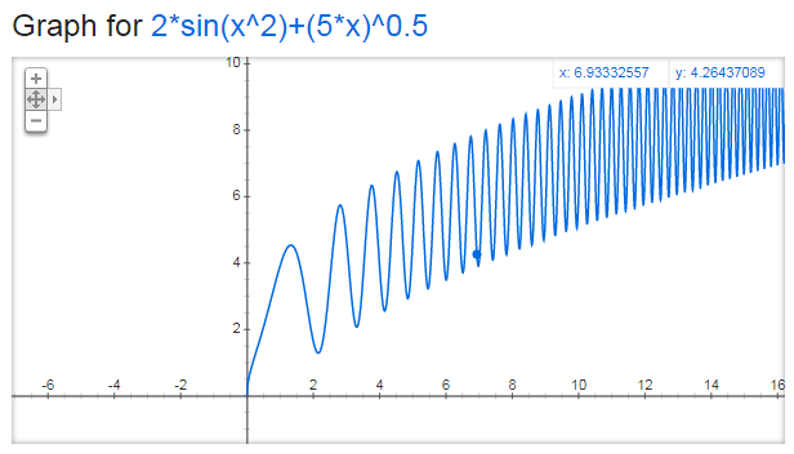

In above example, the composition of several linear function can generalise the data well. 
f(x) = 2*sin(x^2)+(5*x)^0.5

Without using composition of functions if we use only linear function:
f(x) = x
we will get only a line with 45degree angle and will not follow the data distribution well. 

Let f1 → add(); f2 → square(); f3 → sqrt(); f4 → sin(); f5 → mul()

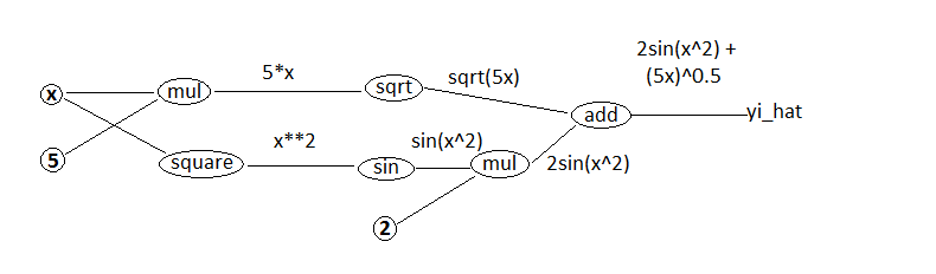

f (x)   = 2sin(x^2) + (5x)^0.5 
        = f1(2sin(x^2), (5x)^0.5 ) 
        = f1( f5(2,sin(x^2)), f3(5x)) 
        = f1(f5(2,f4(x^2)), f3(f5(5,x)) 
        = f1(f5(2,f4(f2(x))), f3(f5(5,x)))
  
This can be thought of as a function of functions. Thus, with MLP we can have complex functions to act on x to get y. Having MLPs we can easily overfit, thus regularizers are applied to avoid overfit. MLP is a graphical way of representing functional compositions. 

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Activation function help us determining the output of neural network. 

AF also normalizes the output in each neuron.

some of the activation functions are below: 

# Linear Activation Function

In [42]:
# Output range in linear activation function is [-inf, +inf], input range [-inf, inf]
def linear_activation_function(x):
    return x

x = np.linspace(-5, 5)
plt.plot(x, linear_activation_function(x), label='linear activation function')
plt.legend()
plt.show()

# Sigmoid Activation Function

In [43]:
# output range of sigmoid [0, 1], input range [-inf, inf]
def sigmoid(x):
    return 1/(1+np.exp(-x))

plt.plot(x, sigmoid(x), label='sigmoid activation function')
plt.legend()
plt.show()

In [44]:
def derivation_of_sigmoid(x):
    return sigmoid(x)* (1-sigmoid(x))

plt.plot(x, derivation_of_sigmoid(x), label = 'sigmoid derivative')
plt.legend()
plt.show()

# tanh Activation Function
problem with tanh is saturation when very low or high values present in the dataset

In [45]:
# output range in tanh activation function is [-1, 1], input range [-inf, +inf]
plt.plot(x, np.tanh(x), label='tanh activation function')
plt.legend()
plt.show()

# Relu Activation Function
Less computationally expensive than tanh and sigmoid
ReLu(x) = max(0, x)
ReLu is not differentiable to 0, and hence weight and bias stop updating at 0, thats why we use Leaky-ReLu

In [46]:
# input range of relu is [-inf, inf], output range [0, inf]
def relu(x):
    x1 = []
    for ele in x:
        if ele < 0:
            x1.append(0)
        else:
            x1.append(ele)
    return x1

plt.plot(x, relu(x), label='relu activation function')
plt.legend()
plt.show()

# Leaky ReLu 
ReluX(x) = max(0.01x, x)

In [47]:
def leaky_relu(x):
    x1=[]
    for ele in x:
        if ele < 0:
            x1.append(0.01 * ele)
        else:
            x1.append(ele)
    return x1

def derivative_of_lrelu(x):
    dx = np.ones_like(x)
    dx[x<0]=0.01
    return dx

plt.plot(x, leaky_relu(x), label='leaky_relu activation function')
plt.plot(x, derivative_of_lrelu(x), label='derivative of leaky relu')
plt.legend()
plt.show()

# SoftMax Activation function
softmax(zi) = e(zi) / sum(e(zj)) 
j = 0 to sample size

In [48]:
def softmax(x):
    return np.exp(x)/ np.sum(np.exp(x), axis=0)

In [49]:
plt.plot(x, softmax(x))

When to use what activation function:
1. **Linear Activation Function**: for linear regression problem, when target is continous variable, linear AF is used in output layer and any other AF can be used in input and hidden layers if problem is regression one.

2. **Sigmoid AF**: in case of binary classification

3. **tanh, relu, l-relu**: for non-linear function

4. **Softmax**: for multi-class classification 

# Loss Function:
## In Regression:
1. **Mean Square Error MSE** = sum(y-y^)^2 /N
2. **Mean Absolute Error MAE** = sum|y-y^|/N
3. **Root Mean Squared Error RMSE** = sqrt(MSE)

## In Classification: 
1. For binary class:

    1.1. **binary cross entropy or Log Loss** 
2. For multi-class classification:

    2.1. **categorical cross entropy**
    
    2.2. **sparse categorical cross entropy** 

# Keras 

Tensorflow and Keras are tool kits or libraries that enable us to code for Deep Learning. 

1. Tensorflow is most popular DL library, open sourced by Google, by Nov, 2015

2. Helps researchers, for developers and for deployment engineers also

3. Core of Tensorflow was written in C/C++ for speed, they made interfaces available in Java, Python and JavaScript

4. Tensorflow Lite can run on Android for deployment on Phone.

5. Tensor is a mathematical term for vectors, 1D vector : 1D tensor, 2D vector : 2D tensor, 3D vector : 3D tensor
    -Deep Learning is all about tensor operations
    -Flow may be inspired from forward and backward propagation (flow of data)
    -It gives lot of low-level control of models
    -With Keras: simple (similar to SKLearn); high level NN library: faster for developing and deploying models; less lines of code
    -Keras is front end: Tensorflow is backend; other backend: Theano, Pytorch, Caffe, MXNET
    -Tensorflow: Research easy, Keras: Development easy

 **Keras modules:**
    -keras.models
    
    -keras.layers 
    
    -keras.activations
    
    -keras.optimizers
    
    -keras.preprocessing
    
    -keras.applications 
    

3-ways to create keras models: 

1. **Sequential Model**: straightforward, a simple list of layers but is limited to single input, single output stack of layers. keras.models.sequential

2. **Functional API**: easy to use, fully featured API that supports arbitrary model architecture, keras industry strength model. keras.models.functional

3. **Model subclassing**: where you implement everything from scratch, if you have complex, out of the box use case.

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import tanh
from tensorflow.keras.optimizers import SGD, Adam

**Optimization** is done using back propagation in which we update weights and bias as there are errors. In optimization we minimize the loss function by reducing error (=actual output - predicted output). 

**Lets add data of Churn Prediction of Credit Card Customer and do Binary Classification**

In [51]:
import pandas as pd
df = pd.read_csv('../input/churn-prediction-for-credit-card-customer/Churn.csv')
df

In [52]:
# Lets check if there are any duplicate values
df.duplicated().sum()

In [53]:
df.info()

In above data, Gender and Geography are non-numerical data, we need to convert them into numerical data. 

Lets do dummy encoding for Gender and Geography columns: 

In [54]:
df.Geography.unique()

In [55]:
df.Gender.unique()

In [56]:
df1 = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [57]:
df1

In [58]:
#separate X and y 
y = df1['Exited']
X = df1.drop(columns='Exited')

In [59]:
X

In [60]:
#Split the data into train and test data
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=100)

In [61]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

In [62]:
#Preprocess the data by using Standard Scaler on columns with different range of values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x_scale = sc.fit_transform(train_x)
test_x_scale = sc.fit_transform(test_x)

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# Here using sigmoid activation function for classification problem
model.add(Dense(3, activation='sigmoid', input_dim=11)) # hidden layer with 3 nodes
model.add(Dense(1, activation='sigmoid'))# Output layer with 1 node
model.summary()

In [64]:
# Now we use Loss functino as binary_crossentropy(log loss) and optimizer as adam
model.compile(loss='binary_crossentropy', optimizer='adam')

In [65]:
#train the model
hist=model.fit(train_x_scale, train_y, epochs=25)

In [66]:
hist.history

In [67]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.xlabel('epochs')
plt.ylabel('log loss')
plt.show()

In [68]:
model.layers[0].get_weights()

In [69]:
#Now predict on test data
model.predict(test_x_scale)

In [70]:
# use ROC curve to get the best threshold for classification 
#problem here for simplicity we are assuming 0.5 as threshold
y_pred_test = np.where(model.predict(test_x_scale)> 0.5, 1, 0)

In [71]:
y_pred_test

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_test, test_y)

**Now how to improve this accuracy**
1. Change hidden layer Activation function to relu 
2. More epochs
3. Increase the number of nodes in hidden layers
4. Increase the number of hidden layers 

In [73]:
model = Sequential()
#Here using sigmoid activation function for classification problem in output layer
model.add(Dense(11, activation='relu', input_dim=11)) # hidden layer with 11 nodes
model.add(Dense(11, activation='relu'))# hidden layer with 11 node
model.add(Dense(1, activation='sigmoid'))# Output layer with 1 node
model.summary()

In [74]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [75]:
hist = model.fit(train_x_scale, train_y, epochs=25, validation_split=0.2)

In [76]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [77]:
y_pred_test = np.where(model.predict(test_x_scale)> 0.5, 1, 0)
accuracy_score(y_pred_test, test_y)